In [60]:
import os
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

DATA_EYES = 'Data/P_Eyes/'
DATA_MIND = 'Data/P_Minds/'
TEST_NUM = '2139'

In [61]:
names_m = ['Time','Att','Med']
data_m = pd.read_csv(DATA_MIND + TEST_NUM + '.csv', names = names_m)

# startswith()方法用於檢查字符串是否是「指定子字符串開頭」，是True，否False。
if data_m['Time'][0].startswith('Time:'):
    # map 從新打開地圖(向量維度空間)
    # lambda x(每個進來的東西) : x(實際上要傳出去的東西)
    # [5,-6] 從字串第5個字開始讀取，去到第6個字
    data_m['Time'] = data_m['Time'].map(lambda x: x[5:-6])
    # 將輸入值轉換成int整數，從第4個字開始讀取
    data_m['Att'] = data_m['Att'].map(lambda x: int(x[4:]))
    data_m['Med'] = data_m['Med'].map(lambda x: int(x[4:]))
else:
    data_m['Time'] = data_m['Time'].map(lambda x: x[0:-6])
    
# drop_duplicates 刪除重複
# subset 指定特定的列
# keep ='last' 刪除重複項並保留「最後」出現
data_m.drop_duplicates(subset='Time', keep='last', inplace = True)

data_m

,Time,Att,Med
7,11:21:18.4,0,0
19,11:21:18.5,0,0
33,11:21:18.6,0,0
48,11:21:18.7,0,0
62,11:21:18.8,0,0
75,11:21:18.9,0,0
89,11:21:19.0,0,0
103,11:21:19.1,0,0
116,11:21:19.2,0,0
129,11:21:19.3,0,0


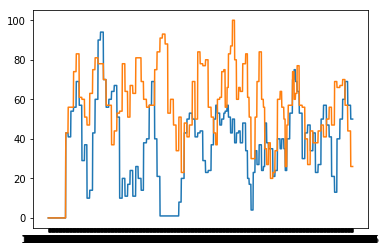

In [62]:
time = data_m['Time']
att = data_m['Att']
med = data_m['Med']

plt.plot(time, att)
plt.plot(time, med)

plt.show()

In [63]:
names_e = ['Time','X','Y','Area']
data_e = pd.read_csv(DATA_EYES + TEST_NUM + '.csv', names = names_e, encoding = 'latin-1', header=0)

if data_e['Time'][0].startswith('Time:'):
    data_e['Time'] = data_e['Time'].map(lambda x: x[5:-6])
    data_e['X'] = data_e['X'].map(lambda x: float(x[2:]))
    data_e['Y'] = data_e['Y'].map(lambda x: float(x[2:]))
    data_e['Area'] = data_e['Area'].map(lambda x: int(x[-1:]))
else:
    data_e['Time'] = data_e['Time'].map(lambda x: x[0:-6])
data_e.drop_duplicates(subset='Time', keep='last', inplace = True)

data_e

,Time,X,Y,Area
0,11:22:20.1,964.410826,607.405272,0
3,11:22:20.2,960.923658,612.470475,0
4,11:22:20.3,957.448964,613.505830,0
11,11:22:20.4,957.223198,615.229487,0
18,11:22:20.5,956.532045,604.926095,0
26,11:22:20.6,834.307465,572.496919,0
31,11:22:20.7,845.640525,576.399066,0
38,11:22:20.8,850.163870,576.656810,0
45,11:22:20.9,899.922614,624.937461,0
46,11:22:21.0,916.841007,644.308625,0


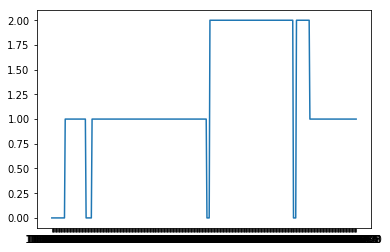

In [64]:
time = data_e['Time']
area = data_e['Area']
x = data_e['X']
y = data_e['Y']

plt.plot(time, area)
#plt.plot(time, x)
#plt.plot(time, y)

plt.show()

In [65]:
# 設定顯示資料內容
# display.width 資料寬度
# display.max_rows 資料最大行數 
pd.set_option('display.width', 1000, 'display.max_rows', 100000)

# merge 資料合併 
# 教學網站 http://violin-tao.blogspot.com/2017/06/pandas-2-concat-merge.html
# on 指定同步行列，sort 排序
data = pd.merge(data_m, data_e, on='Time', sort=True)
#result = pd.merge(data_m, data_e, on='Time', how='outer', sort=True)

data.to_csv('ok.csv')

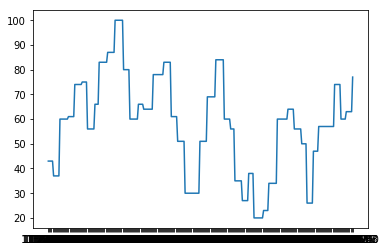

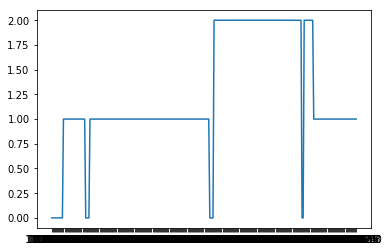

In [66]:
time = data['Time']
att = data['Att']
med = data['Med']
area = data['Area']

#plt.plot(time, att)
plt.plot(time, med)

plt.show()
plt.plot(time, area)
plt.show()

In [67]:
# .groupby('A') 指定要分類的群組 A 列
data_group = data.groupby('Area')
# get_group('B') 取得A列內 包含 B 值 所有的項目
data_A1 = data_group.get_group(1) # 1 = 左邊
data_A2 = data_group.get_group(2) # 2 = 右邊

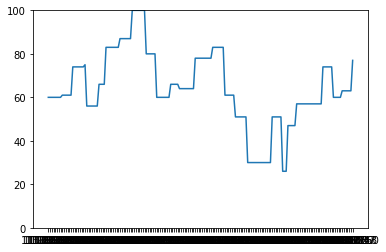

In [68]:
time = data_A1['Time']
att = data_A1['Att']
med = data_A1['Med']

#plt.plot(time, att)
plt.ylim(0,100)
plt.plot(time, med)
plt.show()

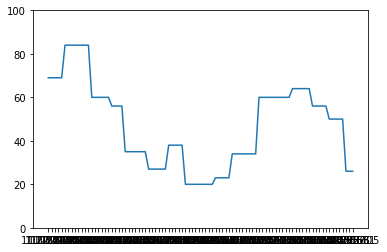

In [69]:
time = data_A2['Time']
att = data_A2['Att']
med = data_A2['Med']

#plt.plot(time, att)
plt.ylim(0,100)
plt.plot(time, med)
plt.show()

In [70]:
print('計算資料如下：')
# count 項目筆數
data_Count = data_A1['Att'].count()
print('第 1 區域的 專注度 資料筆數： %s' %str(data_Count))
# mean 平均值
data_Att_Avg = data_A1['Att'].mean()
print('第 1 區域的 專注度 平均值： %s' %str(data_Att_Avg))
# max 最大值
data_Att_Max = data_A1['Att'].max()
print('第 1 區域的 專注度 最大值： %s' %str(data_Att_Max))
# min 最小值
data_Att_Min = data_A1['Att'].min()
print('第 1 區域的 專注度 最小值： %s' %str(data_Att_Min))
# std 標準差
data_Att_Std = data_A1['Att'].std()
print('第 1 區域的 專注度 標準差： %s' %str(data_Att_Std))
# skew 偏移度
data_Att_Ske = data_A1['Att'].skew()
print('第 1 區域的 專注度 偏移度： %s' %str(data_Att_Ske))

data_Med_Avg = data_A1['Med'].mean()
print('第 1 區域的 冥想度 平均值： %s' %str(data_Med_Avg))

print('='*70)

data_Count = data_A2['Att'].count()
print('第 2 區域的 專注度 資料筆數： %s' %str(data_Count))

data_Att_Avg = data_A2['Att'].mean()
print('第 2 區域的 專注度 平均值： %s' %str(data_Att_Avg))

data_Att_Max = data_A2['Att'].max()
print('第 2 區域的 專注度 最大值： %s' %str(data_Att_Max))

data_Att_Min = data_A2['Att'].min()
print('第 2 區域的 專注度 最小值： %s' %str(data_Att_Min))

data_Att_Std = data_A2['Att'].std()
print('第 2 區域的 專注度 標準差： %s' %str(data_Att_Std))

data_Att_Ske = data_A2['Att'].skew()
print('第 2 區域的 專注度 偏移度： %s' %str(data_Att_Ske))

data_Med_Avg = data_A2['Med'].mean()
print('第 2 區域的 冥想度 平均值： %s' %str(data_Med_Avg))

計算資料如下：
第 1 區域的 專注度 資料筆數： 175
第 1 區域的 專注度 平均值： 43.14857142857143
第 1 區域的 專注度 最大值： 75
第 1 區域的 專注度 最小值： 4
第 1 區域的 專注度 標準差： 15.920083669359558
第 1 區域的 專注度 偏移度： -0.46774541475175896
第 1 區域的 冥想度 平均值： 64.06285714285714
第 2 區域的 專注度 資料筆數： 92
第 2 區域的 專注度 平均值： 33.55434782608695
第 2 區域的 專注度 最大值： 48
第 2 區域的 專注度 最小值： 21
第 2 區域的 專注度 標準差： 7.510233502515279
第 2 區域的 專注度 偏移度： -0.047855295964226684
第 2 區域的 冥想度 平均值： 47.358695652173914


In [71]:
def count_time(data):

    start_time = 0 # 記錄每次注視開始的時間
    temp_time  = 0 # 借放上一次時間
    total_time = 0 # 計算總和的觀看時間
    count = 0      # 目前統計筆數
    Area = 0
    see_freq = 0   # 看該區域的次數

    # see: 
    # https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
    # iterrows 取得每一行
    for index, row in data.iterrows():
        # if not Ture -> False
        # if not False -> Ture
        # 如果int等於0時 ； String等於''時 ; Bool等於false -> False
        # if not Area=0 -> Ture
        if not Area:
            Area = row['Area'] # 懶得傳，用拿的
            
        # 先轉成時間格式方便計算，但毫秒已經損毀無法轉換故直接捨棄
        # strptime() 把「時間符串」解析為「時間元組」。
        time = datetime.strptime(row['Time'][:-2], '%H:%M:%S')

        # 如果已經有上一筆
        if temp_time:
            # 如果和上一筆間隔太久
            if (time - temp_time).seconds > 3:
                total_time += (temp_time - start_time).seconds # 總結上一次的時間長度
                start_time  = time # 把這次視為新的開始
                see_freq += 1

            # 如果這是最後一筆
            if count == (data['Time'].count() - 1):
                total_time += (time - start_time).seconds # 總結這次的時間長度

        # 如果是第一筆，紀錄為第一次的開始時間
        else:
            start_time = time
            see_freq += 1

        temp_time = time # 記下這次時間
        count += 1
        
        if not total_time:
            total_time = 1

    return total_time, see_freq

ctime, freq = count_time(data_A1)
print('第 1 區域的 注視時間： %s 秒' %str(ctime))
print('第 1 區域的 注視次數： %s 次' %str(freq))
print('第 1 區域的 平均注視時間： %s 秒' %str(ctime//freq))

print('='*70)

ctime2, freq2 = count_time(data_A2)
print('第 2 區域的 注視時間： %s 秒' %str(ctime2))
print('第 2 區域的 注視次數： %s 次' %str(freq2))
print('第 2 區域的 平均注視時間： %s 秒' %str(ctime2//freq2))

第 1 區域的 注視時間： 28 秒
第 1 區域的 注視次數： 2 次
第 1 區域的 平均注視時間： 14 秒
第 2 區域的 注視時間： 15 秒
第 2 區域的 注視次數： 1 次
第 2 區域的 平均注視時間： 15 秒


In [72]:
# 每 5 秒
#time = datetime.strptime(data_A1['Time'][4][:-2], '%H:%M:%S')
#time
from datetime import timedelta

def cov(time_str):
    time_str = time_str[:-2]
    time = datetime.strptime(time_str, '%H:%M:%S')
    return time


def count_F(data):
    time = map(lambda x: cov(x), data['Time']) 
    time = list(time)

    att = list(data['Att'])

    start_i = 0
    target_t = time[start_i] +  timedelta(seconds = 5)
    att_list = []
    upup_times = 0
    downdown_times = 0
    a = 0

    print('┌───────┬─────┬─────┬──────┐')
    print('│%7s│%5s│%5s│%6s│' %('Range','Max','Min','F'))
    print('├───────┼─────┼─────┼──────┤')

    for i in range(len(time)):
        if time[i] >= target_t or (i + 1) == len(time):

            # 取得最大最小值
            att_list = pd.Series(att[start_i: i])
            att_max       = att_list.max()
            att_max_index = att_list.idxmax()
            att_min       = att_list.min()
            att_min_index = att_list.idxmin()

            # 計算斜率
            x = att_max_index - att_min_index
            y = att_max - att_min
            f = y / x

            # 門檻
            if f >= 0.8 or f <= -0.8:

                # 計算次數
                is_upup = False
                if att_max_index > att_min_index:
                    is_upup = True
                    upup_times += 1
                else:
                    downdown_times += 1

                # 計算面積
                ta = (x * y) / 2
                if ta < 0:
                    ta = ta * -1
                a += ta

            print('│%3s-%3s│%5s│%5s│%6.2f│' %(start_i, i, att_max, att_min, f))
            #print(' Maxp:%3s, Minp:%3s' %(att_max_index, att_min_index))

            # 準備下一個區間
            start_i = i
            target_t = time[start_i] +  timedelta(seconds = 5)

    tom = (upup_times - downdown_times)/(upup_times + downdown_times)
    print('├───────┴─────┴─────┴──────┤')
    print('│up times: %-16d│\n│down times: %-14d│\n│Tom: %-21.2f│\n│Area: %-20.2f│' %(upup_times, downdown_times, tom, a))
    print('└──────────────────────────┘')